In [36]:
import datetime
import os
from datetime import datetime
from datetime import date
import time
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.dates import AutoDateLocator, DateFormatter
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
#pip install scipy, pip install scipy-1.2.0-cp36-cp36m-win_amd64.whl
import scipy.io as sio
from scipy import stats
from scipy import ndimage
from skimage import data, io, filters
from mpl_toolkits.basemap import Basemap

import netCDF4# pip install netCDF4
import h5py# pip install h5py
import shapefile# pip install pyshp
from netCDF4 import Dataset
import xlrd# pip install xlrd,  .xls and .xlsx,
import xlwt# pip install xlwt, .xls
import pathlib#pip install pathlib2
from pathlib import Path

import seaborn as sns
import xgboost as xgb#pip install xgboost
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier#模型融合voting

# 机器学习算法
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
###########获取文件路径、文件名、后缀名############
def get_filename(filename):
  (filepath,tempfilename) = os.path.split(filename);
  (shotname,extension) = os.path.splitext(tempfilename);
  #return filepath, shotname, extension
  return shotname
################################################################################
# 字符串时间转换为计算机存储时间
def Normaltime1(datetime1):
    Normaltime = datetime.strptime(datetime1,'%Y-%m-%d %H_%M')
    return Normaltime

# datetime时间转为字符串
def Changestr(datetime1):
    str1 = datetime1.strftime('%Y-%m-%d %H:%M')
    return str1

#Excel时间序列处理方法一
def TS(x):
    return (x - np.datetime64('1970-01-01T00:00:00Z'))/np.timedelta64(1, 's')
    #return datetime.utcfromtimestamp(x.astype('O')/1e9)
    #return datetime.fromtimestamp(x.tolist()/1e9)

##Excel时间序列处理方法二
def DT(x):
    return datetime.utcfromtimestamp(x)

%matplotlib inline
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
         'legend.fontsize': med,
         'figure.figsize': (16, 10),
         'axes.labelsize': med,
         'axes.titlesize': med,
         'xtick.labelsize': med,
         'ytick.labelsize': med,
         'figure.titlesize': large}
plt.rcParams.update(params)
#plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [38]:
path=pathlib.Path('D:\\人工智能产品\\AM-天空识别预测模型\\')
df=path/'PlumeShp_PM.xlsx'
df_D=pd.DataFrame(pd.read_excel(df, sheet_name=u'PlumeShp_PM_D'))
df_H=pd.DataFrame(pd.read_excel(df, sheet_name=u'PlumeShp_PM_H'))

In [39]:
df_H.columns.values.tolist()

['Time', 'PM2.5', 'Area', 'Length']

In [40]:
df_H.tail()

,Time,PM2.5,Area,Length
263,2019-03-23 11:00:00,14,9105.325444,377.907290
264,2019-03-23 12:00:00,13,10120.710059,420.797898
265,2019-03-23 13:00:00,16,9788.165680,433.355737
266,2019-03-23 14:00:00,8,9219.526627,421.457894
267,2019-03-23 15:00:00,6,9218.934911,389.782229


<Figure size 3000x2400 with 0 Axes>

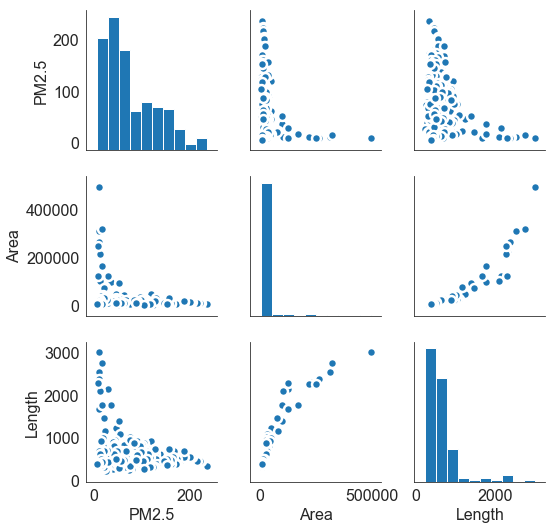

In [41]:
plt.figure(figsize=(10,8), dpi= 300)
sns.pairplot(df_H, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

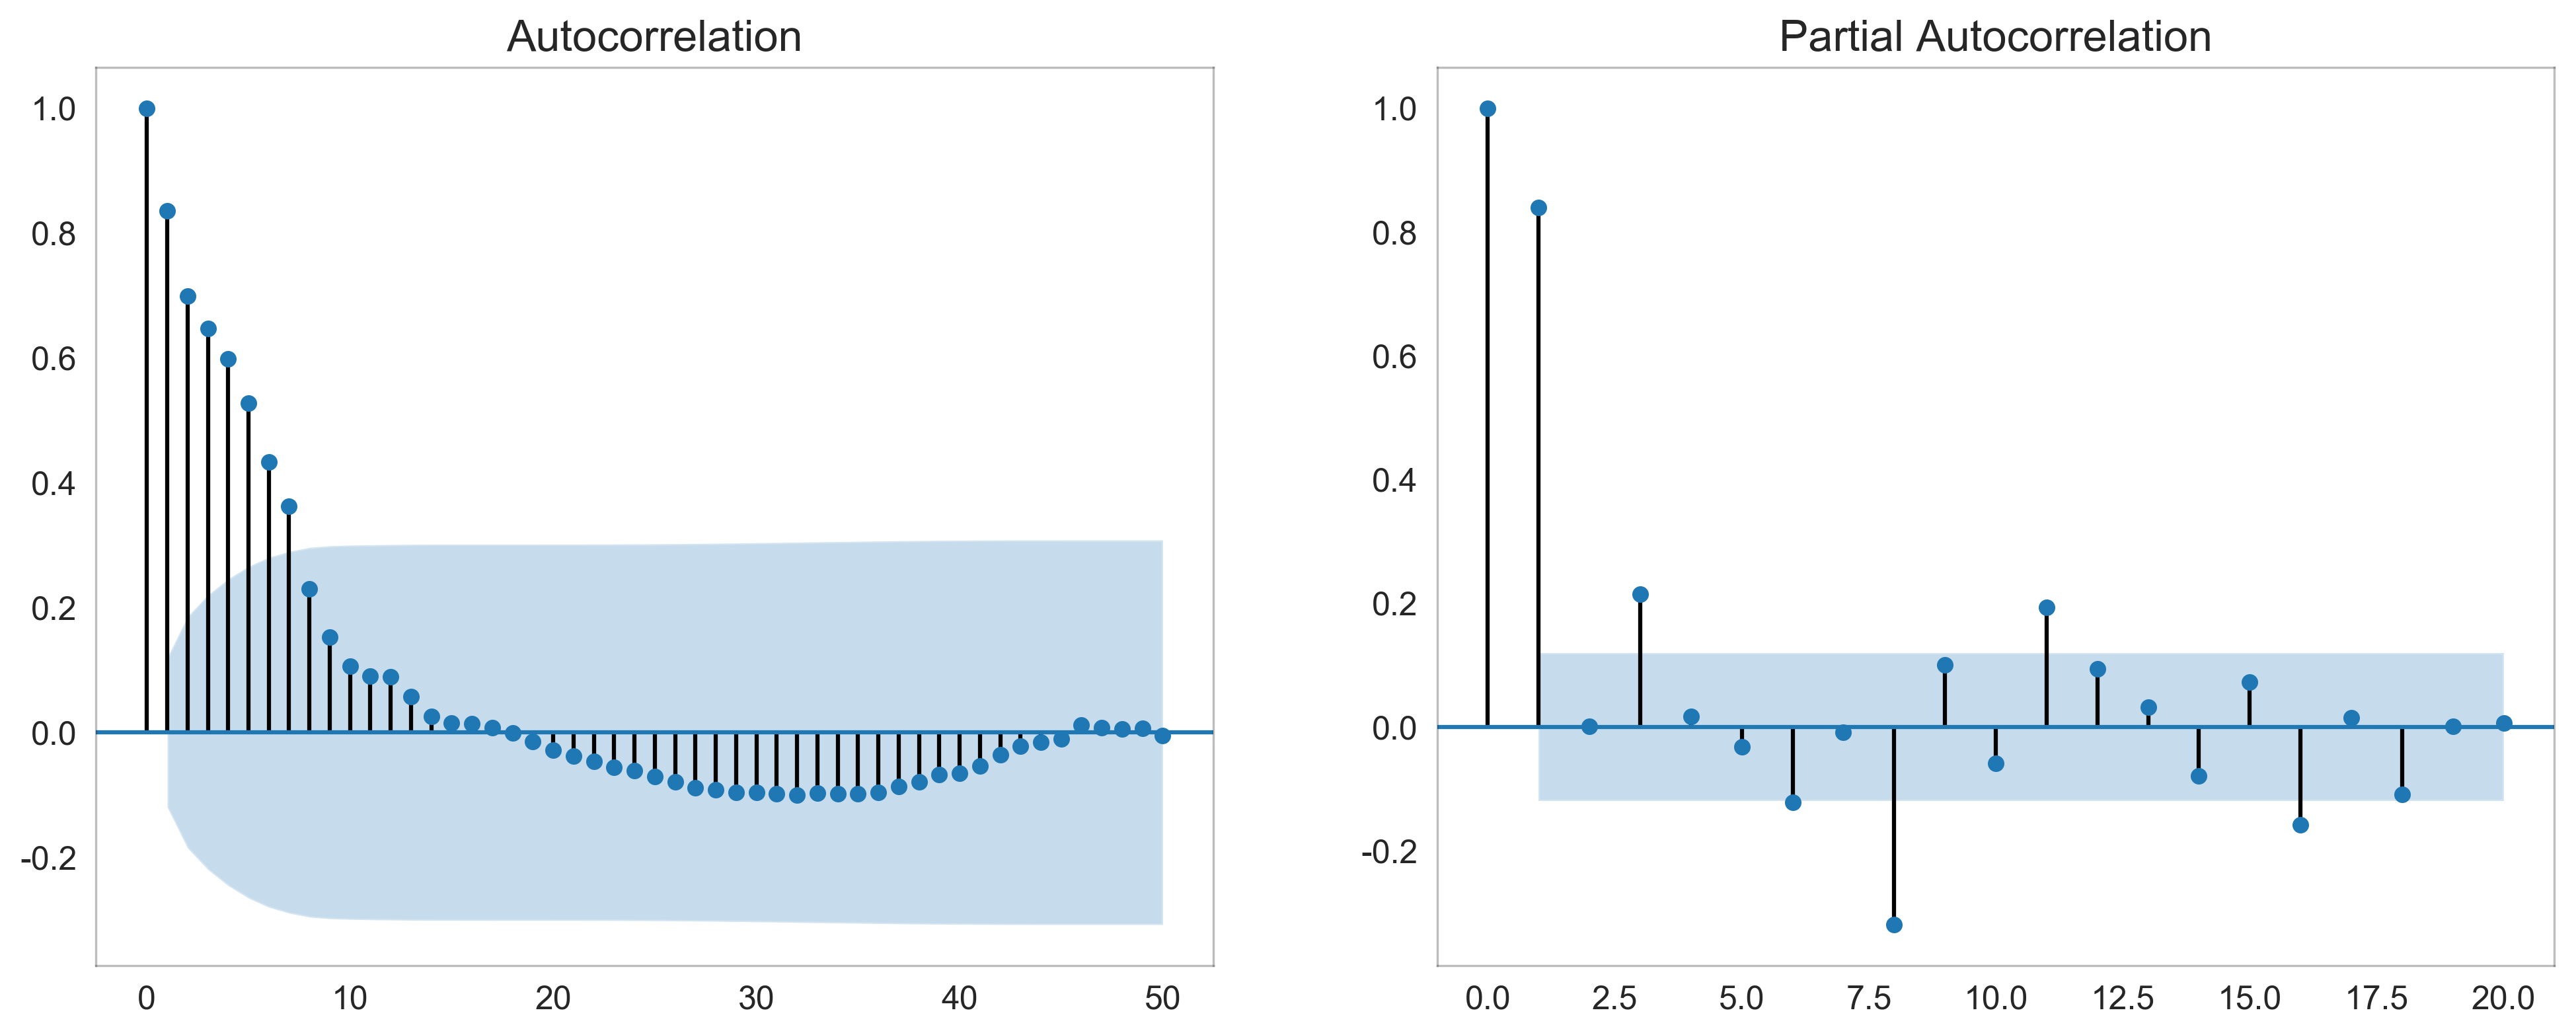

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 300)
plot_acf(df_H['Area'].tolist(), ax=ax1, lags=50)
plot_pacf(df_H['Area'].tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


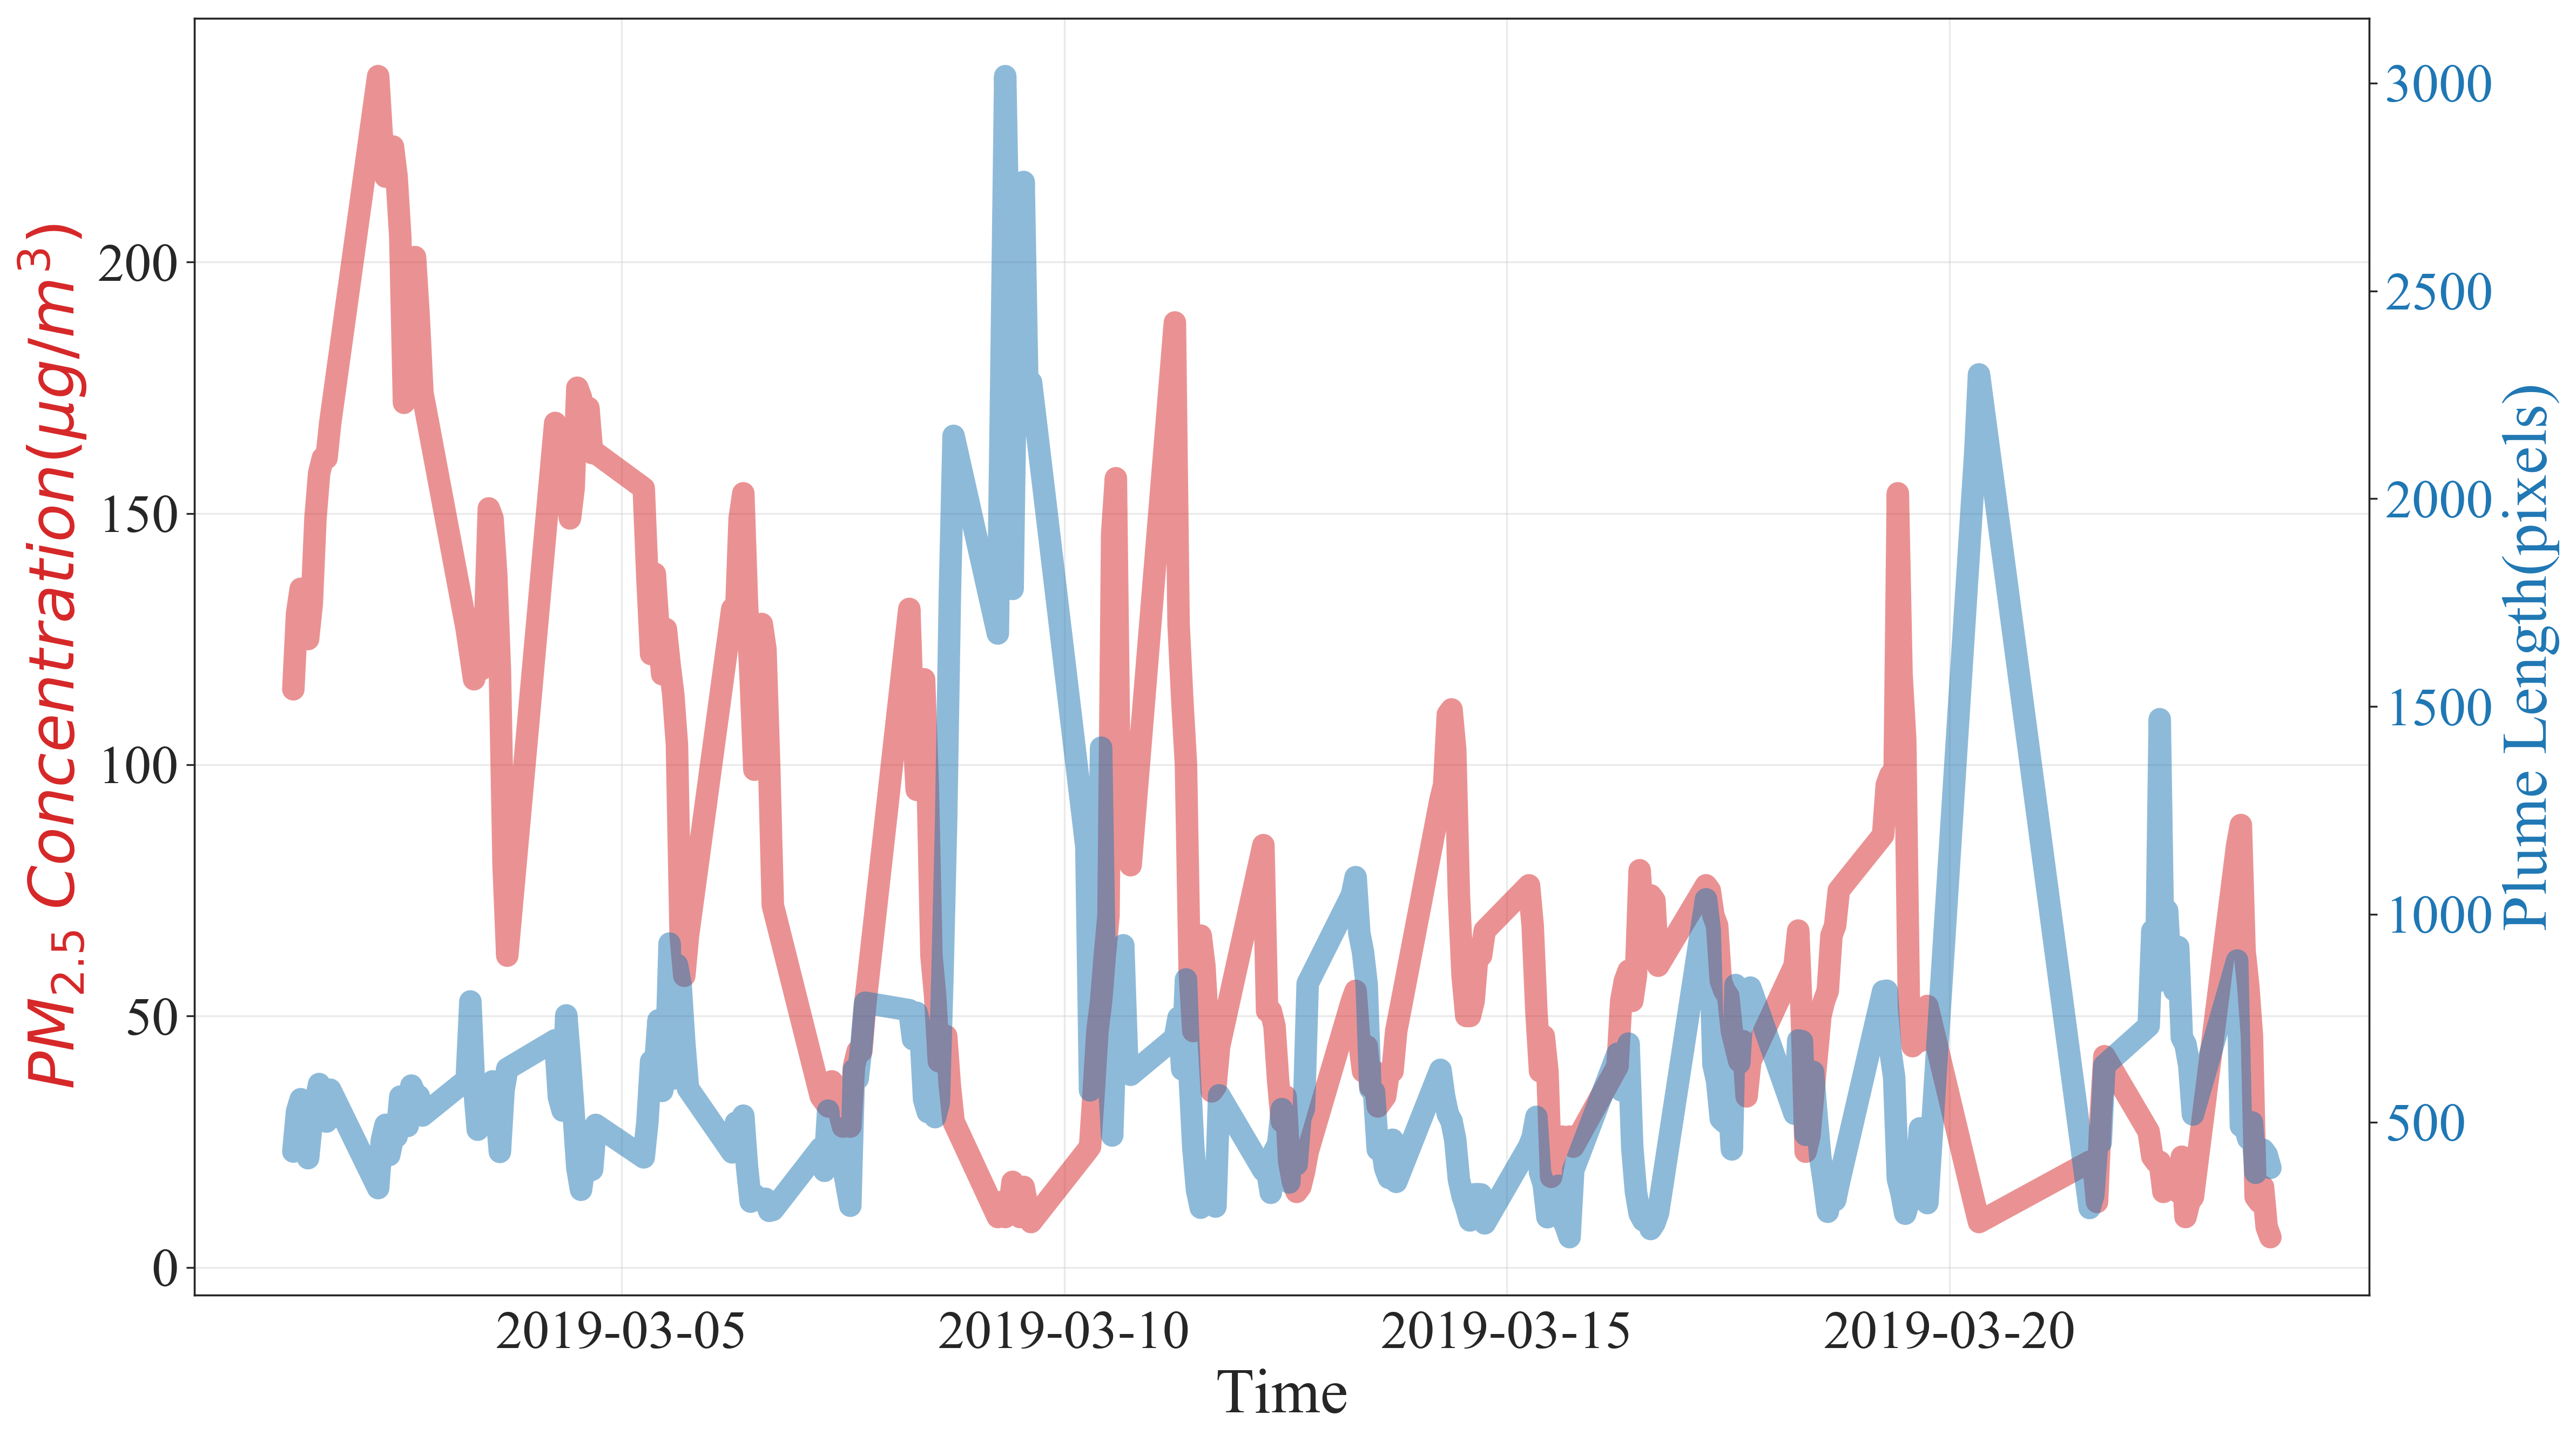

In [60]:
x=df_H['Time']
X=[DT(TS(i)) for i in x]
y1 = df_H['PM2.5']
y2 = df_H['Length']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 300)
ax1.plot(X, y1, color='tab:red',linestyle='solid',linewidth=10, alpha=0.5)
ax1.tick_params(labelsize=24)

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(X, y2, color='tab:blue',linestyle='solid',linewidth=10, alpha=0.5)
ax2.tick_params(labelsize=24)

plt.xticks(fontsize=24)

plt.gca()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5)) 

# Decorations
#ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=28)
#ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('$PM_{2.5}$'+ ' '+'$Concentration (µg/m^3)$', color='tab:red', fontsize=28)
#ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Plume Length(pixels)", color='tab:blue', fontsize=28)
ax2.tick_params(axis='y', labelcolor='tab:blue')


#ax2.set_title("PM2.5 and Plume Length", fontsize=22)
fig.tight_layout()
plt.show()

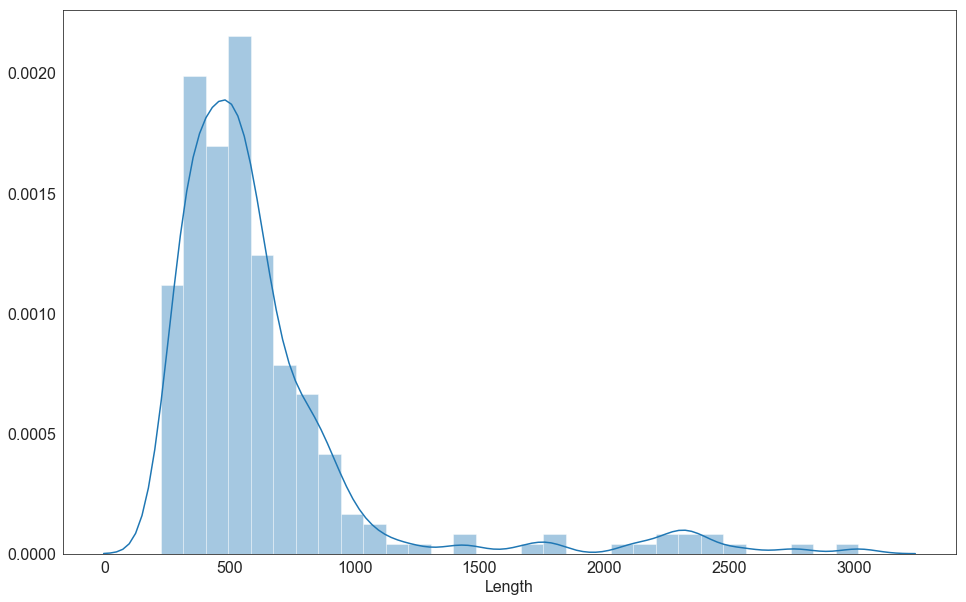

In [44]:
sns.distplot(df_H['Length'])

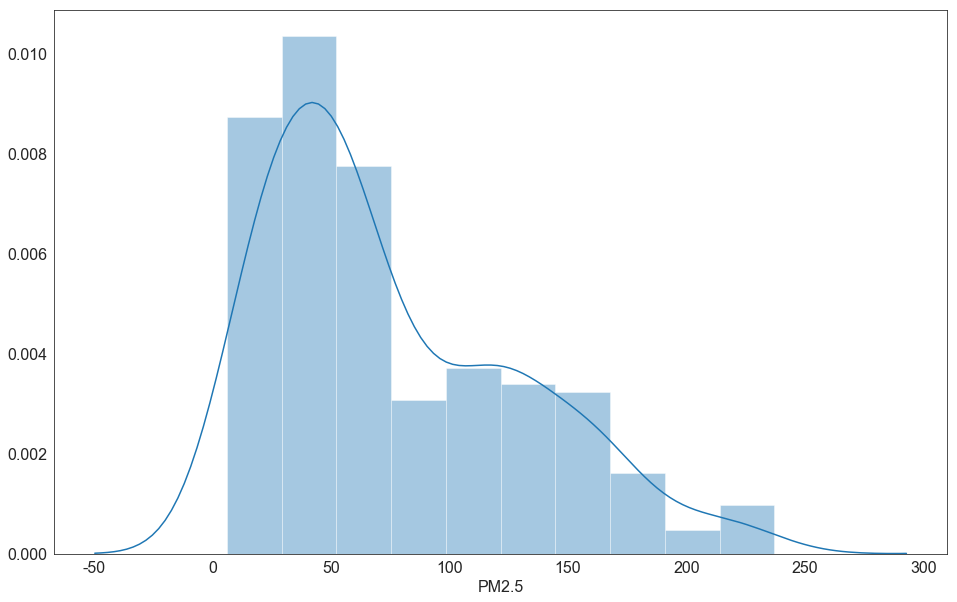

In [45]:
sns.distplot(df_H['PM2.5'])

In [46]:
outlier = 999000
stack_H=500
df_Ab=df_H[(df_H['Length']>stack_H)&(df_H['Length']!=outlier)&(df_H['Length']>0)]
df_Ab.tail()

,Time,PM2.5,Area,Length
254,2019-03-22 15:00:00,22,32995.266272,703.209068
255,2019-03-22 16:00:00,10,30663.313609,686.630260
256,2019-03-22 17:00:00,13,26422.485207,636.371967
257,2019-03-22 18:00:00,14,15908.875740,518.102927
258,2019-03-23 06:00:00,84,27086.390533,888.795945


In [47]:
from sklearn.preprocessing import StandardScaler
dfH=df_H[['PM2.5', 'Area', 'Length']].values
dfHS=StandardScaler().fit_transform(dfH)
#from sklearn.preprocessing import MinMaxScaler
#dfHS=MinMaxScaler().fit_transform(dfH)
dfHS

array([[ 7.25142788e-01, -3.49909384e-01, -4.58437373e-01],
       [ 1.00490037e+00, -2.54570491e-01, -2.41300061e-01],
       [ 1.09815290e+00, -1.87590764e-01, -1.73796759e-01],
       [ 9.86249865e-01, -2.44219283e-01, -2.63882880e-01],
       [ 9.11647843e-01, -3.44879730e-01, -4.94255691e-01],
       [ 1.04220138e+00, -2.80538326e-01, -2.96793354e-01],
       [ 1.35925998e+00, -2.43691618e-01, -1.91881311e-01],
       [ 1.52711452e+00, -2.07249078e-01, -9.14066224e-02],
       [ 1.58306604e+00, -2.68087687e-01, -1.84889239e-01],
       [ 1.58306604e+00, -2.80931268e-01, -2.95401502e-01],
       [ 1.71361958e+00, -2.35653153e-01, -1.22187170e-01],
       [ 3.00050446e+00, -3.79806637e-01, -6.57058471e-01],
       [ 2.77669839e+00, -2.92225536e-01, -3.96744680e-01],
       [ 2.62749435e+00, -2.36450263e-01, -3.13139946e-01],
       [ 2.64614485e+00, -3.46417816e-01, -4.77476848e-01],
       [ 2.73939738e+00, -2.58151874e-01, -3.82825097e-01],
       [ 2.62749435e+00, -2.82155001e-01

intercept_:0.000
coef_:-0.258
intercept_:0.093
coef_:-0.305
Variance r2 score: -0.030


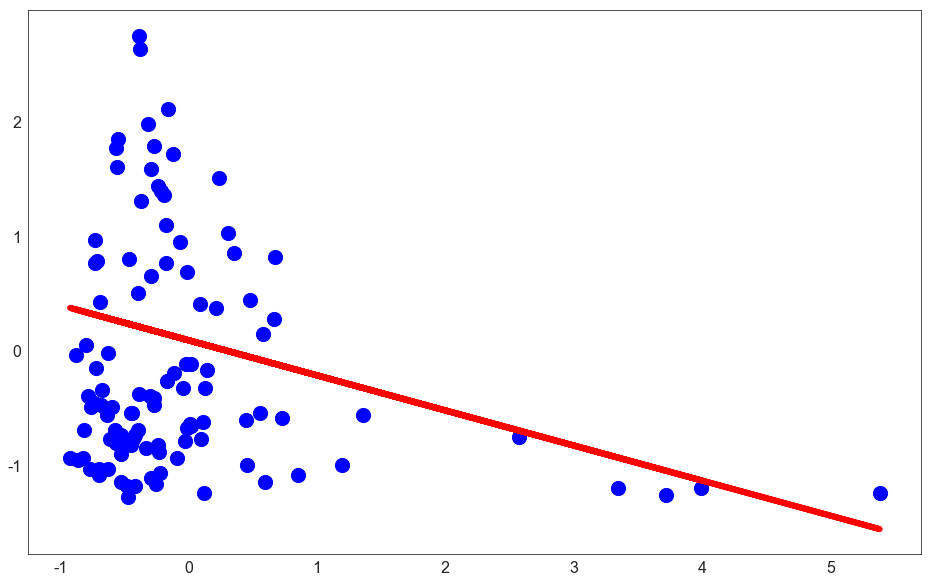

In [48]:
from sklearn import datasets , linear_model
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression


PMD=pd.DataFrame(dfHS,columns=['PM2.5','Area','Length'])
PMC=PMD['PM2.5'].values
PLA=PMD['Area'].values
PLL=PMD['Length'].values
X = PLL[:, np.newaxis]
y=PMC

#All-fit
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
print('intercept_:%.3f'% model.intercept_)
print('coef_:%.3f' % model.coef_)

X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)
#coef_：回归系数(斜率)
#intercept_：截距项

print('intercept_:%.3f' % LR.intercept_)
print('coef_:%.3f' % LR.coef_)
#print('Mean squared error: %.3f' % mean_squared_error(y_test,LR.predict(X_test)))
print('Variance r2 score: %.3f' % r2_score(y_test,LR.predict(X_test)))
#print('score: %.3f' % LR.score(X_test,y_test))

plt.scatter(X_test , y_test ,s=200, color ='blue')
plt.plot(X_test ,LR.predict(X_test) ,color='red',linewidth =6)
plt.show()

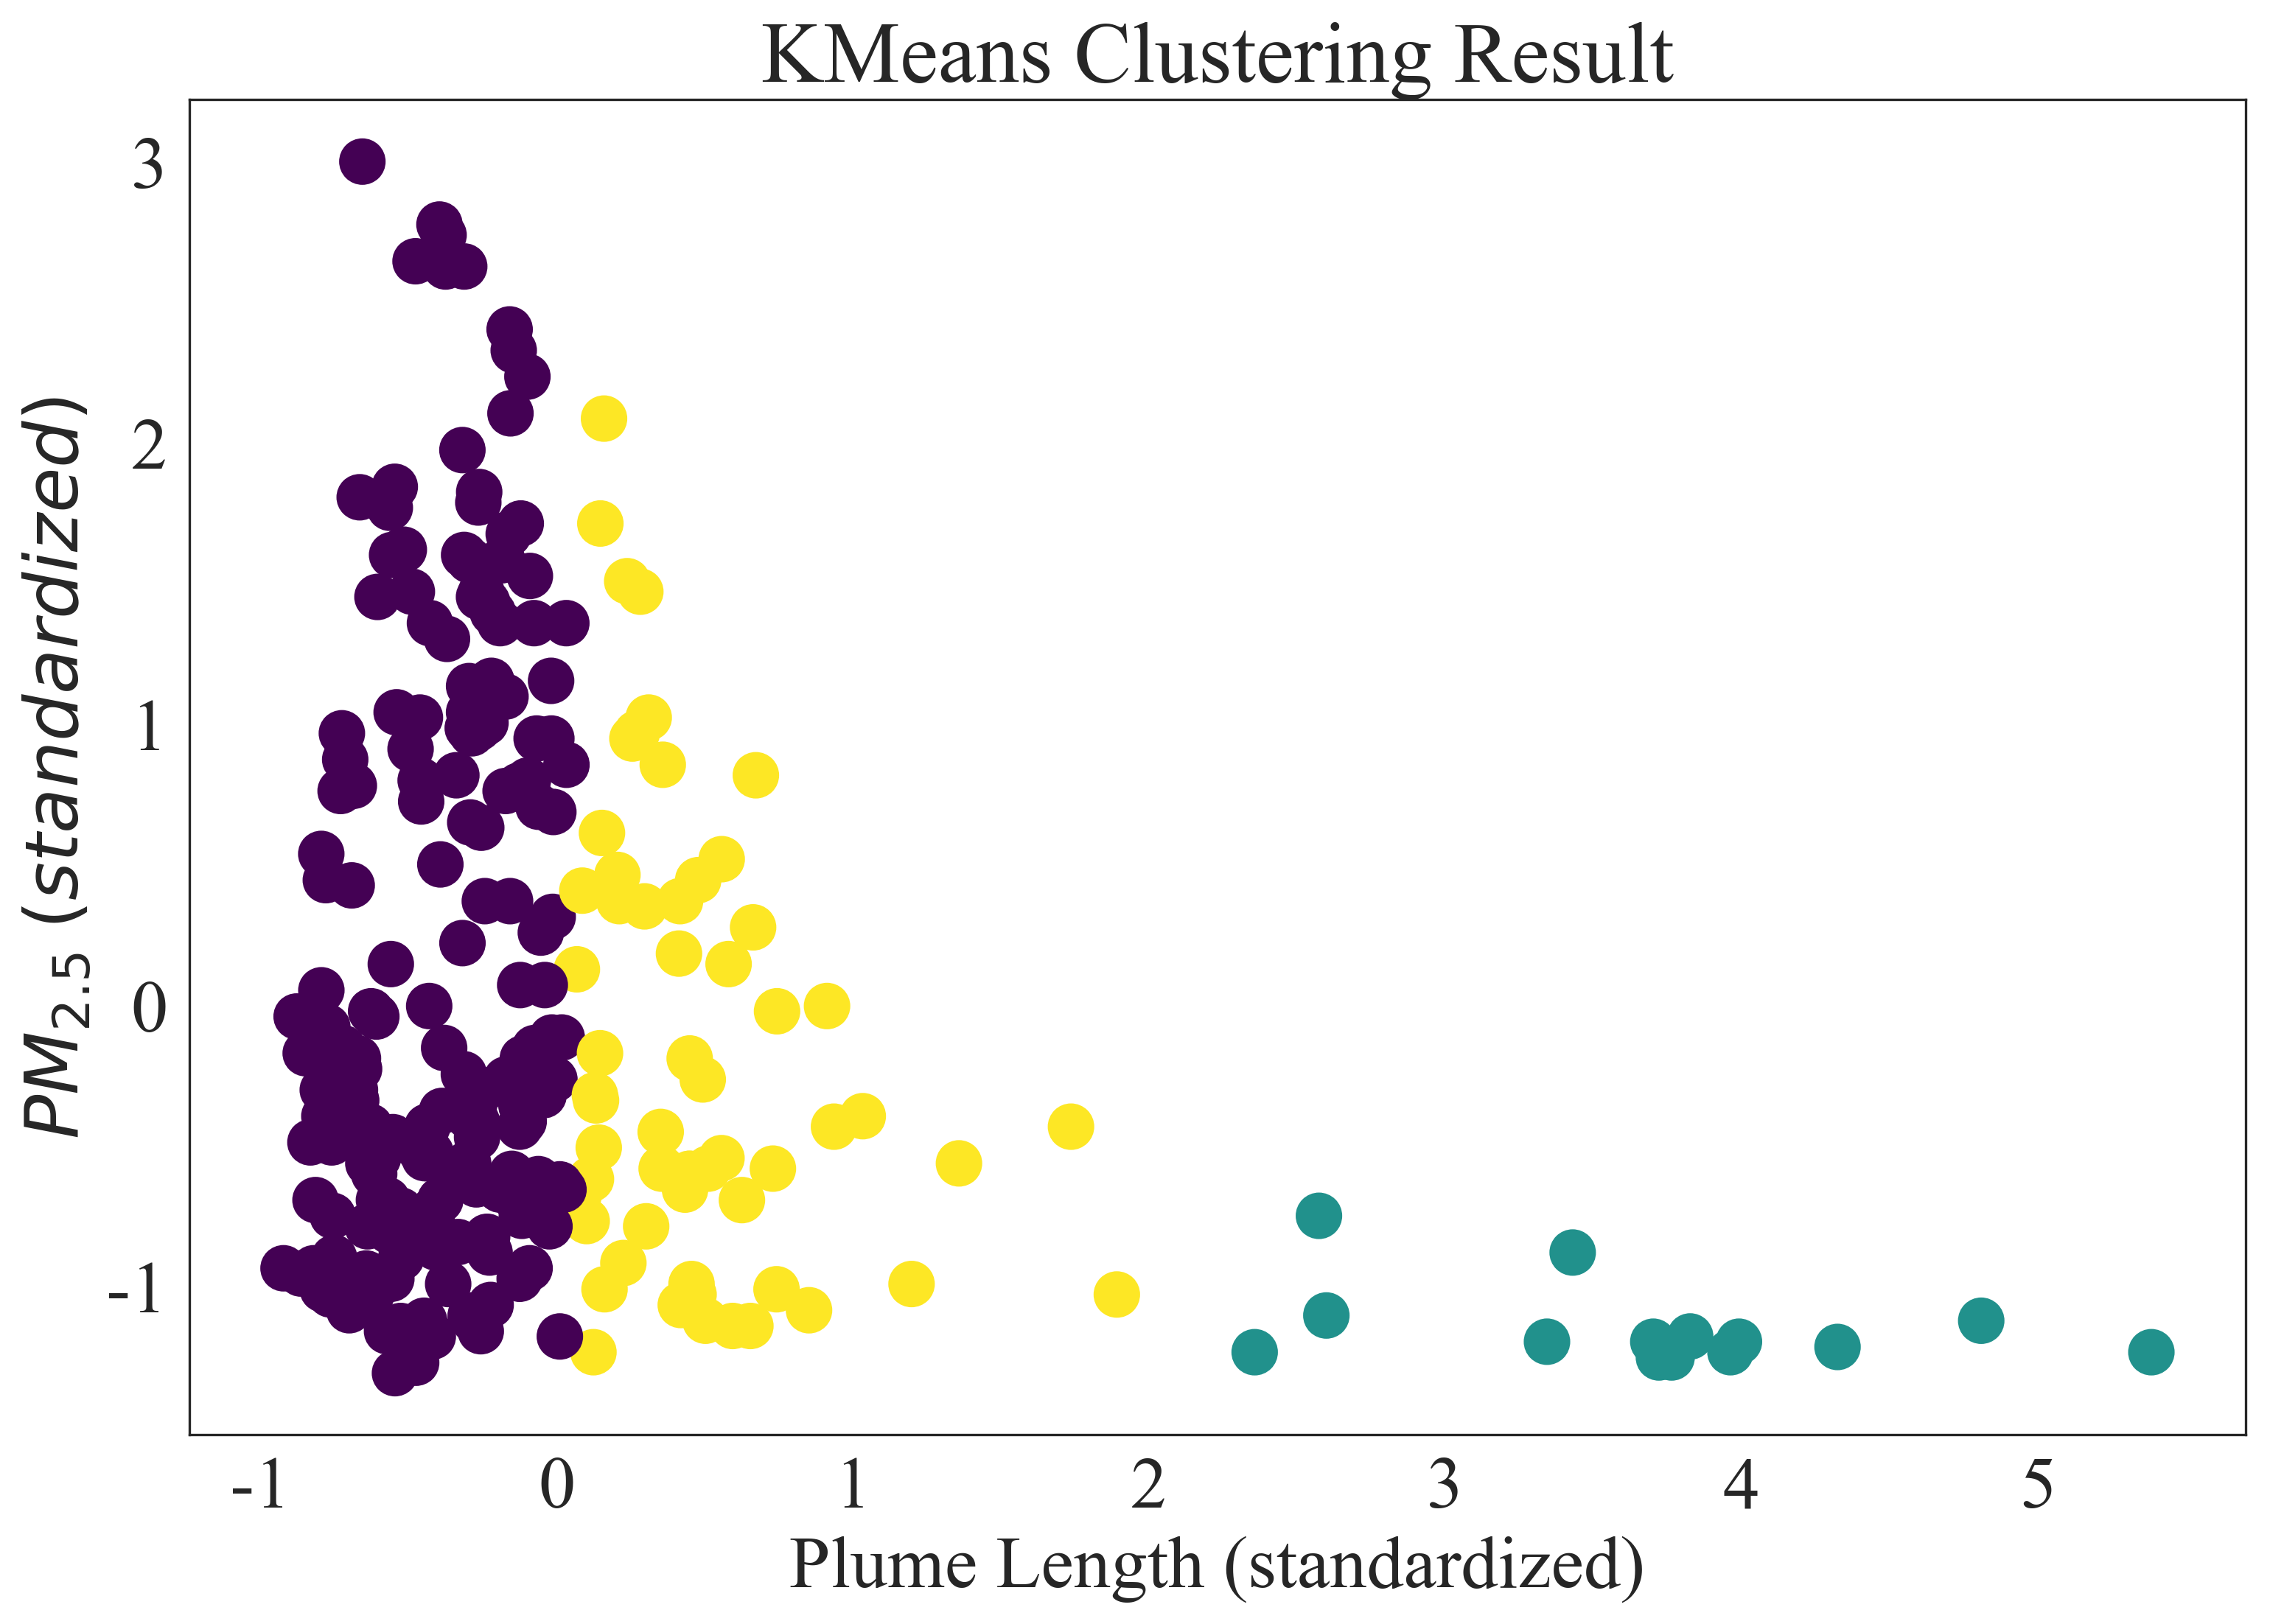

In [49]:
#unsupervised machine learning models: clustering algorithms
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.rcParams['axes.unicode_minus']=False 
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'#
fig = plt.figure(figsize=(12,8),dpi= 300)                                                               
ax = fig.add_subplot(111)

plt.scatter(X, y, c=y_kmeans, s=200, cmap='viridis')
plt.tick_params(labelsize=24)
plt.ylabel('$PM_{2.5}$'+ ' '+'$ (standardized)$', fontsize=24)
plt.xlabel('Plume Length (standardized)', fontsize=24)
titleStr='KMeans Clustering Result'
plt.title(str(titleStr), fontsize=28)
plt.show()

In [50]:
stack_H=500
stack_2H=1000
stack_3H=1500

df_0H=df_H[(df_H['Length']<stack_H)]
df_1H=df_H[(df_H['Length']>stack_H)&(df_H['Length']<stack_2H)]
df_2H=df_H[(df_H['Length']>stack_2H)&(df_H['Length']<stack_3H)]
df_3H=df_H[(df_H['Length']>stack_3H)]

print(df_0H['PM2.5'].mean(),df_0H['PM2.5'].std())
print(df_1H['PM2.5'].mean(),df_1H['PM2.5'].std())
print(df_2H['PM2.5'].mean(),df_2H['PM2.5'].std())
print(df_3H['PM2.5'].mean(),df_3H['PM2.5'].std())

74.68067226890756 55.01632003988148
86.31496062992126 51.53003451330963
43.125 20.53176980750981
14.714285714285714 8.01372449113271


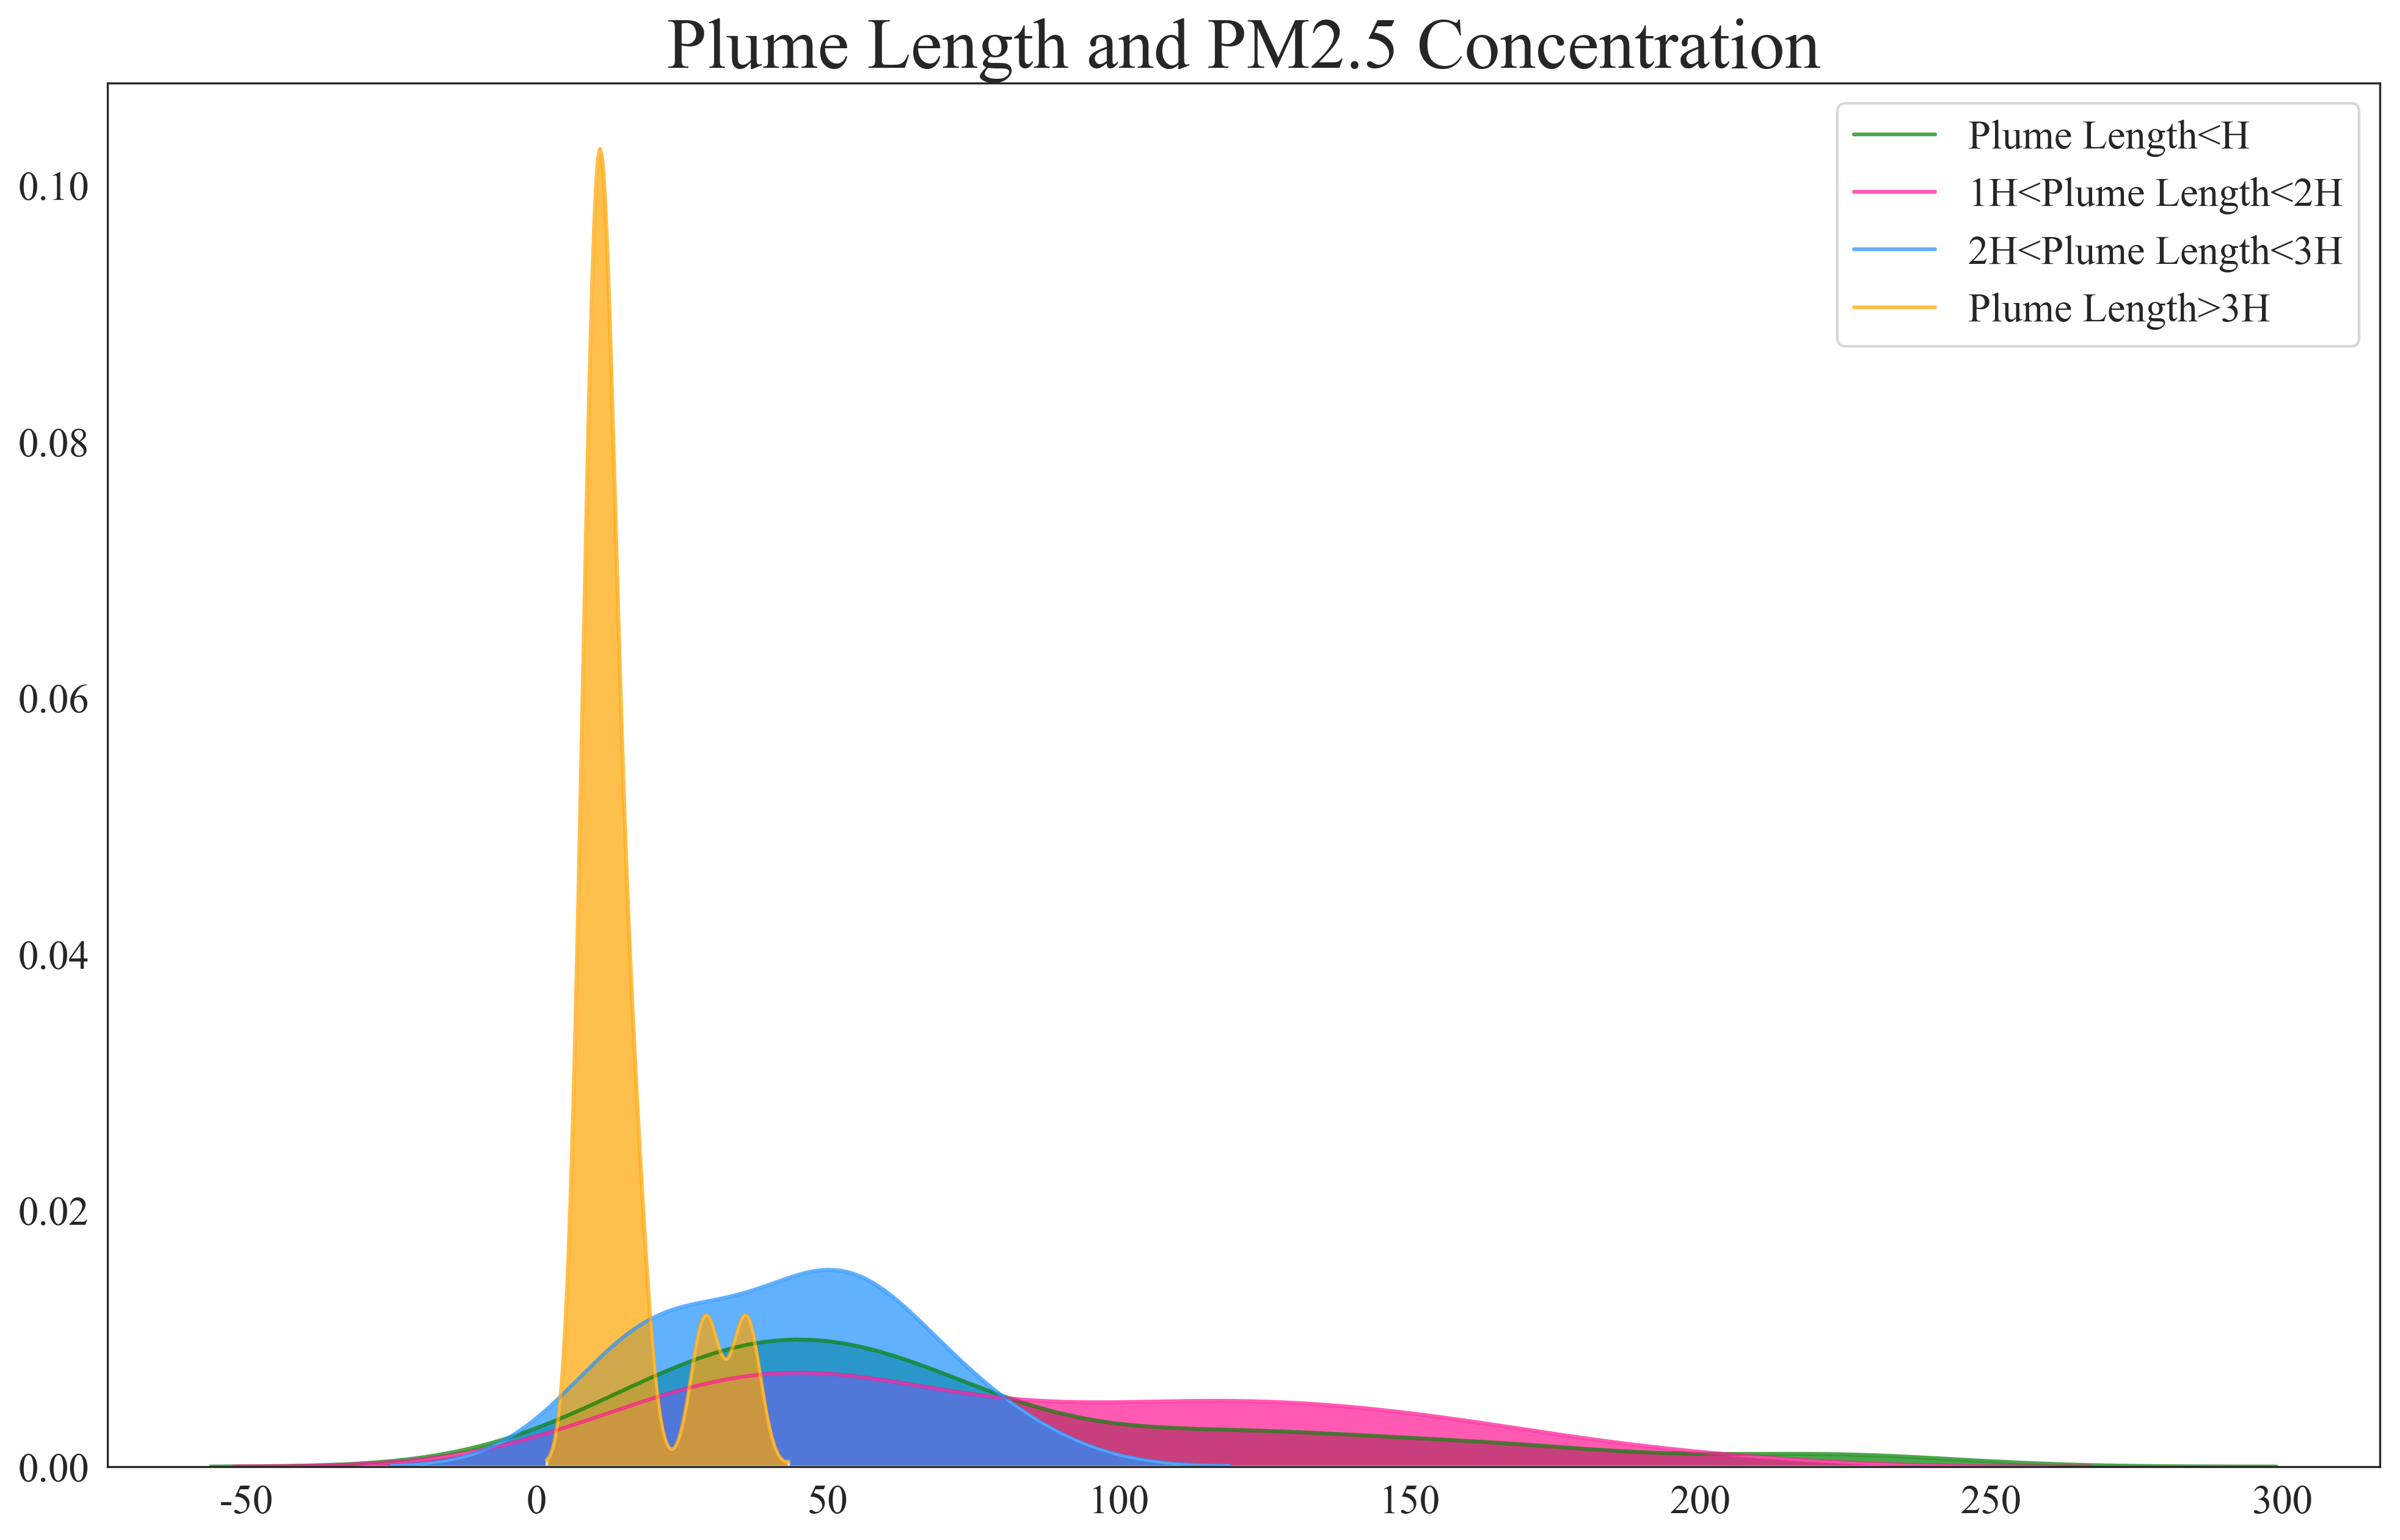

In [51]:
plt.figure(figsize=(16,10), dpi= 300)
sns.kdeplot(df_0H['PM2.5'], shade=True, color="g", label="Plume Length<H", alpha=.7)
sns.kdeplot(df_1H['PM2.5'], shade=True, color="deeppink", label="1H<Plume Length<2H", alpha=.7)
sns.kdeplot(df_2H['PM2.5'], shade=True, color="dodgerblue", label="2H<Plume Length<3H", alpha=.7)
sns.kdeplot(df_3H['PM2.5'], shade=True, color="orange", label="Plume Length>3H", alpha=.7)

# Decoration
plt.title('Plume Length and PM2.5 Concentration', fontsize=28)
plt.legend()
plt.show()

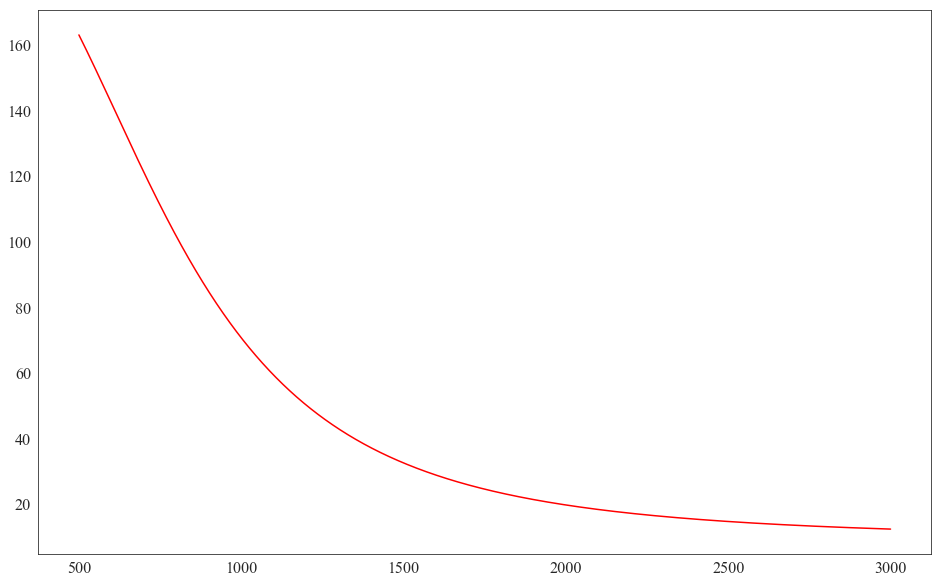

In [52]:
def func(x, A1,A2,s, p):
    return (A1-A2)/(1+pow(x/s, p))+A2
x = np.arange(500, 3000, 1)
y=func(x,205,9,771,3)
plt.plot(x, y,'r',label='original values')

In [57]:
df_fit=df_H[(df_H['Length']>stack_H)]
print(df_fit.shape[0],df_fit.shape[1])

149 4


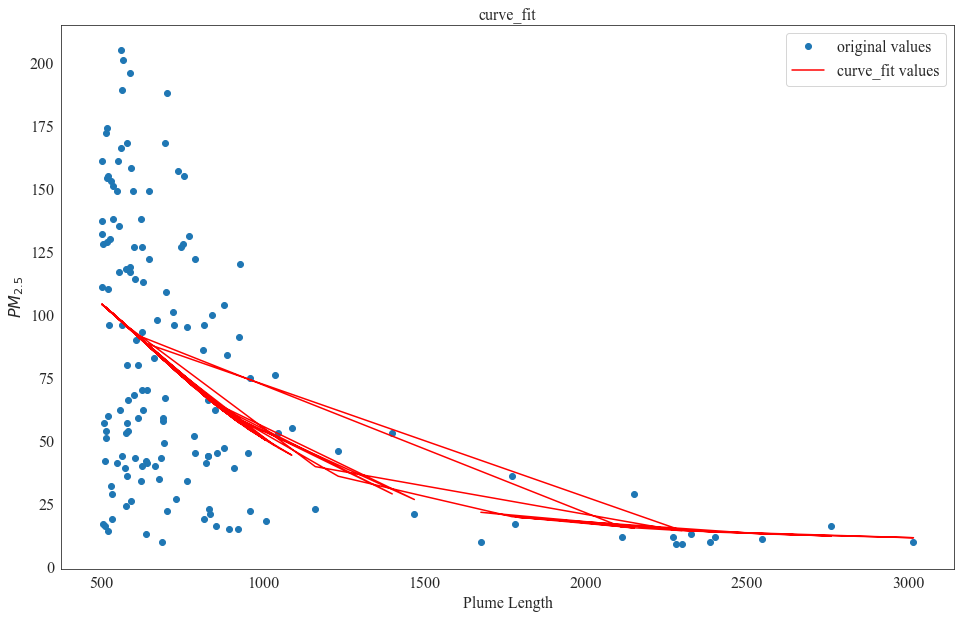

In [56]:
from scipy.optimize import curve_fit

def func(x, A1,A2,s, p):
    return (A1-A2)/(1+pow(x/s, p))+A2

x=df_fit['Length'].values
y=df_fit['PM2.5'].values

popt, pcov = curve_fit(func,x, y,maxfev=1000000)
Yfit=func(x,*popt)

plt.plot(x, y, 'o',label='original values')
plt.plot(x, Yfit, 'r',label='curve_fit values')
plt.xlabel('Plume Length')
plt.ylabel('$PM_{2.5}$')
#plt.legend(loc=4)
plt.legend(loc='best')
plt.title('curve_fit')
plt.show()